# Spotify Hit Predictor model for 60's Dataset

### Load Libraries

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import tensorflow as tf
import joblib
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline
import matplotlib as mpl #add'l plotting functionality

mpl.rcParams['figure.dpi'] = 400 #high res figures
plt.style.use('dark_background')

### Load Dataset

In [2]:
df = pd.read_csv('dataset-of-60s.csv')
df.head

<bound method NDFrame.head of                                track                       artist  \
0              Jealous Kind Of Fella                Garland Green   
1                      Initials B.B.             Serge Gainsbourg   
2                       Melody Twist                  Lord Melody   
3                      Mi Bomba Sonó                   Celia Cruz   
4                        Uravu Solla                  P. Susheela   
...                              ...                          ...   
8637                 Le ire di Ursus           Giampiero Boneschi   
8638                           A-B-C                John Zacherle   
8639               Useless Landscape         Antônio Carlos Jobim   
8640               Vendedor De Assaí                     Ary Lobo   
8641  Mambo Simphony - Remasterizado  Orquesta Casino De La Playa   

                                       uri  danceability  energy  key  \
0     spotify:track:1dtKN6wwlolkM8XZy2y9C1         0.417  0.6200    

In [3]:
df.shape

(8642, 19)

8642 smaples having 19 features.

### Shuffle The Data

In [4]:
df = df.sample(frac = 1)

### Balance The Dataset


#### Dropping Categorical features

In [5]:
X = df.drop(['target', 'track', 'artist', 'uri'], axis=1)

In [6]:
X.shape

(8642, 15)

Modified dataframe X


In [7]:
Y = df['target']

Now lets check if hits and flops counts are balanced

In [8]:
hit_flop_count = Y.value_counts()

In [9]:
hit_flop_count

1    4321
0    4321
Name: target, dtype: int64

We observe that dataset target values of hits and flops are well balanced.i.e, equal.

In [10]:
Y = Y.values

### Standardize The Inputs

In [11]:
scaler = StandardScaler()
scaled_X = scaler.fit_transform(X)

### Split The Dataset into Train,Validation and Test

Training and Testing split (ratio of 90% to 10% respectively)

In [12]:
x_train, x_test, y_train, y_test = train_test_split(scaled_X, Y, test_size=0.1, random_state=1)

Training and Validation split

In [13]:
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=(1/9), random_state=1)

In [14]:
x_train.shape, x_test.shape, x_val.shape

((6912, 15), (865, 15), (865, 15))

### Create The Deep Learning Algorithm

Using standard notations used globally for training neural networks

In [15]:
nn = 200 #number of neurons in hidden layers
target_count = 2

In [16]:
model_60 = tf.keras.Sequential()
model_60.add(tf.keras.layers.Flatten())

In [17]:
model_60.add(tf.keras.layers.Dense(nn, activation=tf.nn.relu))# first hidden  layer
model_60.add(tf.keras.layers.Dense(nn, activation=tf.nn.relu))# second hidden layer
model_60.add(tf.keras.layers.Dense(nn, activation=tf.nn.relu))# third hidden layer

In [18]:
model_60.add(tf.keras.layers.Dense(target_count, activation=tf.nn.softmax))# output layer

In [19]:
model_60.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

#### Fitting the model

In [20]:
model_fit = model_60.fit(x_train, y_train, epochs=20, validation_data=(x_val, y_val), batch_size=100)

Epoch 1/20
70/70 [==============================] - 1s 8ms/step - loss: 0.5481 - accuracy: 0.7095 - val_loss: 0.5200 - val_accuracy: 0.7549
Epoch 2/20
70/70 [==============================] - 0s 5ms/step - loss: 0.5031 - accuracy: 0.7565 - val_loss: 0.5005 - val_accuracy: 0.7815
Epoch 3/20
70/70 [==============================] - 0s 4ms/step - loss: 0.4816 - accuracy: 0.7661 - val_loss: 0.5122 - val_accuracy: 0.7572
Epoch 4/20
70/70 [==============================] - 0s 4ms/step - loss: 0.4654 - accuracy: 0.7769 - val_loss: 0.4882 - val_accuracy: 0.7815
Epoch 5/20
70/70 [==============================] - 0s 4ms/step - loss: 0.4502 - accuracy: 0.7860 - val_loss: 0.4979 - val_accuracy: 0.7803
Epoch 6/20
70/70 [==============================] - 0s 4ms/step - loss: 0.4414 - accuracy: 0.7909 - val_loss: 0.4950 - val_accuracy: 0.7746
Epoch 7/20
70/70 [==============================] - 0s 4ms/step - loss: 0.4262 - accuracy: 0.7935 - val_loss: 0.4871 - val_accuracy: 0.7769
Epoch 8/20
70/70 [==

In [21]:
#Storing the predictions
predictions = model_60.predict(x_test)

### Visualize Neural Network Loss History

#### Loss Variation Plot

In [22]:
training_loss = model_fit.history['loss']
validation_loss = model_fit.history['val_loss']
epoch_count1 = range(1, len(training_loss) + 1)

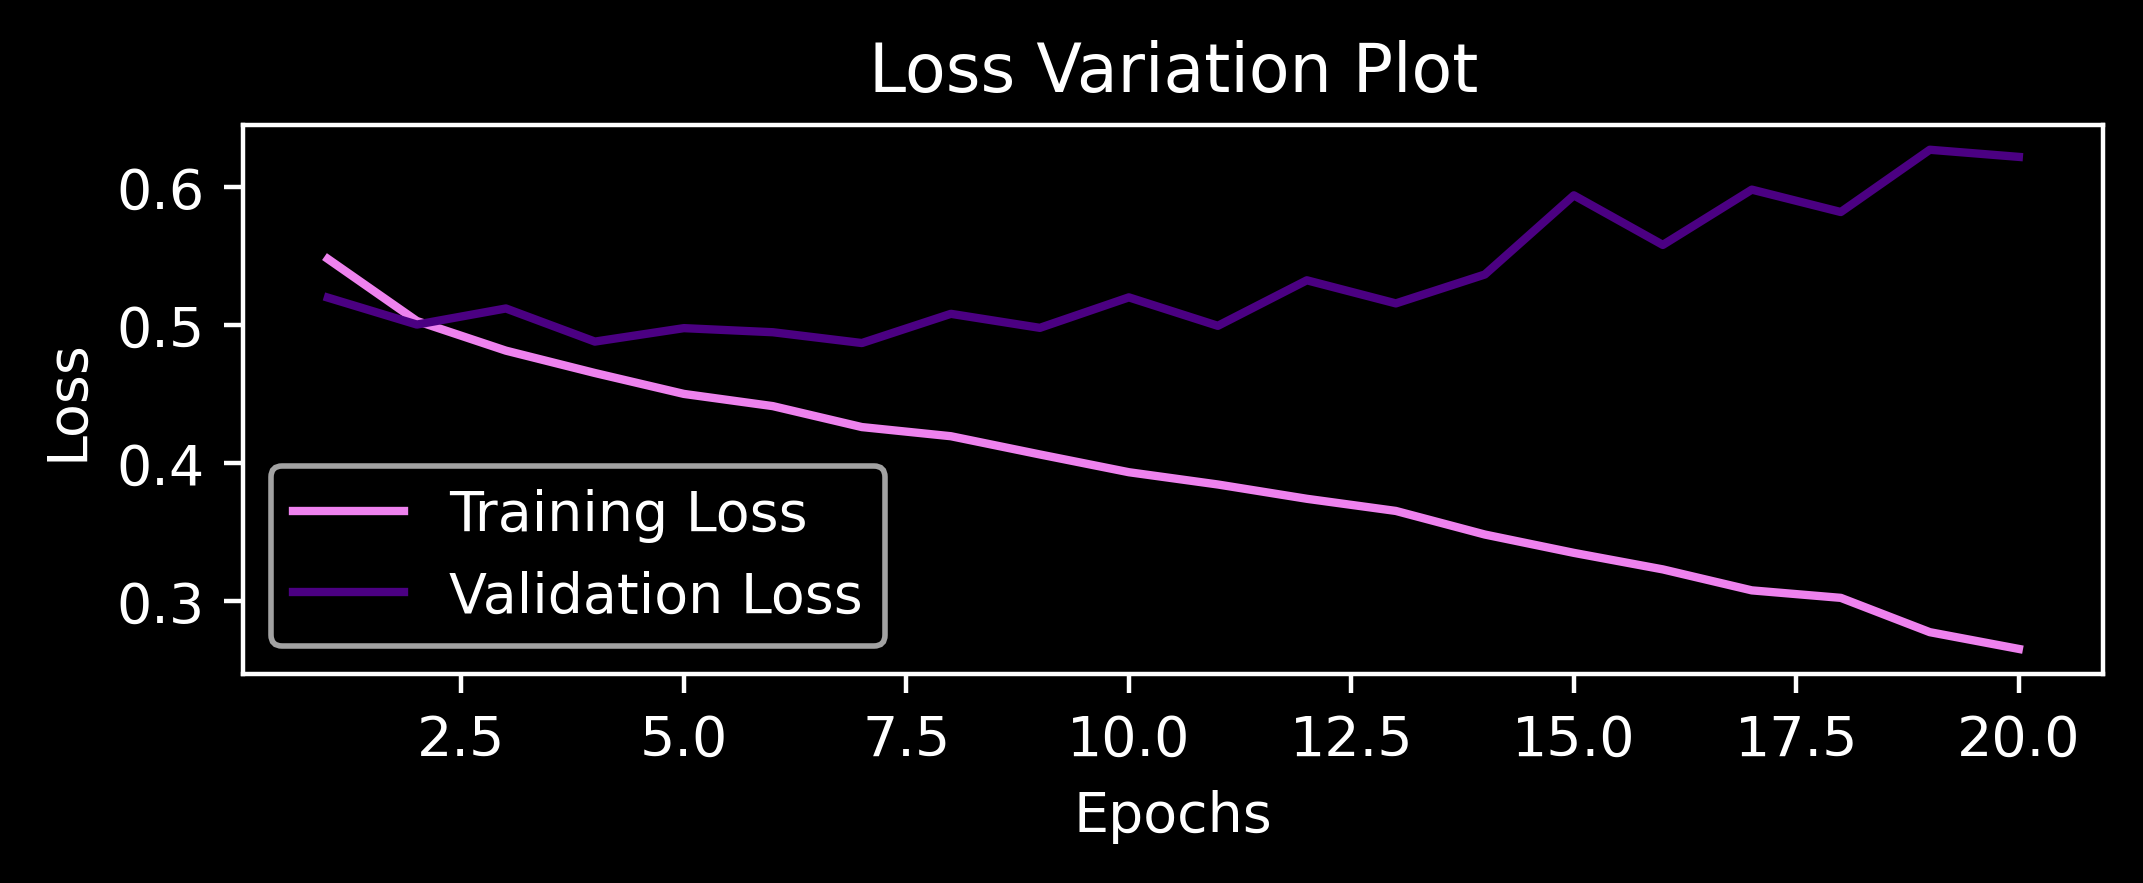

In [23]:
plt.subplot(2,1,2)
plt.title('Loss Variation Plot')
plt.plot(epoch_count1, training_loss, color='violet', label='Training Loss')
plt.plot(epoch_count1, validation_loss, color='indigo', label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

#### Accuracy Variation Plot

In [24]:
training_acc = model_fit.history['accuracy']
validation_acc = model_fit.history['val_accuracy']
epoch_count2 = range(1, len(training_acc) + 1)

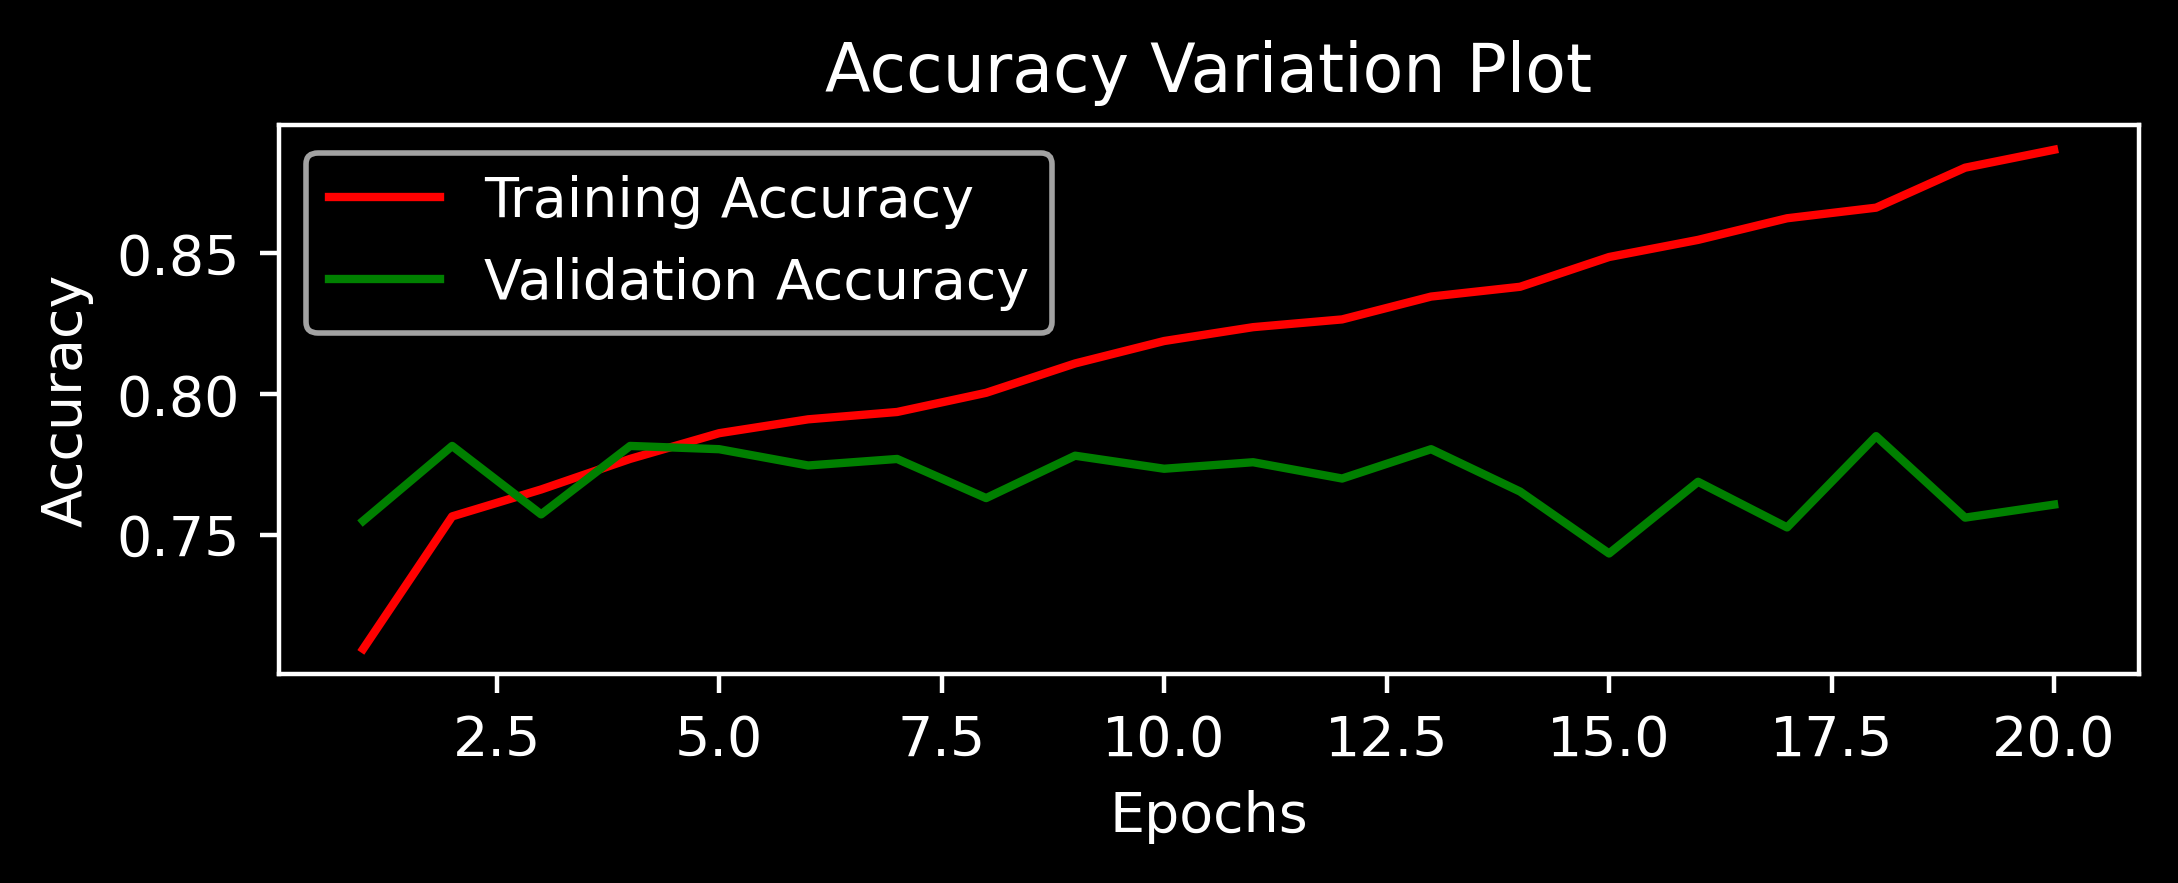

In [25]:
plt.subplot(2,1,2)
plt.title('Accuracy Variation Plot')
plt.plot(epoch_count2, training_acc, color='red', label='Training Accuracy')
plt.plot(epoch_count2, validation_acc, color='green', label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

### Test The Model

In [26]:
print(predictions[215])
print('Predicted:', np.argmax(predictions[215]))
print('Original:', y_test[215])

[0.9623677  0.03763226]
Predicted: 0
Original: 0


### Saving model and Verifying

In [27]:
model_60.save('Trained_model_60')

Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
INFO:tensorflow:Assets written to: Trained_model_60\assets


In [28]:
model = tf.keras.models.load_model('Trained_model_60')
print(x_test[1])

[-1.43164671 -1.9095696  -0.31203576 -2.48353973 -1.75836744 -0.20634915
  1.27301238 -0.49510938  0.08538646 -1.96950477 -0.31768336  1.51368028
  0.34815316  0.58030356  1.41274388]


In [29]:
print(x_test[1].reshape( 1,-1))

[[-1.43164671 -1.9095696  -0.31203576 -2.48353973 -1.75836744 -0.20634915
   1.27301238 -0.49510938  0.08538646 -1.96950477 -0.31768336  1.51368028
   0.34815316  0.58030356  1.41274388]]


In [30]:
v = model.predict(x_test[1].reshape( 1,-1))
print(v)

[[9.9907625e-01 9.2376838e-04]]
